In [ ]:
# Main Packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
"""url = 'https://raw.githubusercontent.com/lukaswangbk/Delivery-Delay-Prediction/main/Dataset/brazilian_ecommerce.csv'
df1 = pd.read_csv(url)"""

"url = 'https://raw.githubusercontent.com/lukaswangbk/Delivery-Delay-Prediction/main/Dataset/brazilian_ecommerce.csv'\ndf1 = pd.read_csv(url)"

In [ ]:
url = 'https://raw.githubusercontent.com/lukaswangbk/Delivery-Delay-Prediction/main/Dataset/brazilian_ecommerce_cleaned.csv'
df1 = pd.read_csv(url)

In [ ]:
df1.head()

,order_status,quantity,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,sale,is_delayed,product_volume_cm
0,delivered,1.0,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,utilidades_domesticas,40.0,268.0,4.0,500.0,3149,sao paulo,SP,9350.0,maua,SP,29.99,False,1976.0
1,delivered,1.0,29.99,8.72,3.0,voucher,1.0,2.00,4.0,utilidades_domesticas,40.0,268.0,4.0,500.0,3149,sao paulo,SP,9350.0,maua,SP,29.99,False,1976.0
2,delivered,1.0,29.99,8.72,2.0,voucher,1.0,18.59,4.0,utilidades_domesticas,40.0,268.0,4.0,500.0,3149,sao paulo,SP,9350.0,maua,SP,29.99,False,1976.0
3,delivered,1.0,29.99,7.78,1.0,credit_card,3.0,37.77,4.0,utilidades_domesticas,40.0,268.0,4.0,500.0,3366,sao paulo,SP,9350.0,maua,SP,29.99,False,1976.0
4,delivered,1.0,29.99,7.78,1.0,credit_card,1.0,37.77,5.0,utilidades_domesticas,40.0,268.0,4.0,500.0,2290,sao paulo,SP,9350.0,maua,SP,29.99,False,1976.0


#Data Viz

In [ ]:
df1['datetime'] =  pd.to_datetime(df1['order_purchase_timestamp'])
df1['weekday'] = df1.datetime.dt.dayofweek
weekwise_data = df1.groupby(['weekday']).size().reset_index()
weekwise_data = weekwise_data.rename(columns={0: 'counts'})
weekwise_data['weekday'] = weekwise_data['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'})

In [ ]:
weekwise_data.head()

,weekday,counts
0,Monday,19366
1,Tuesday,19315
2,Wednesday,18640
3,Thursday,17826
4,Friday,17006


Text(0, 0.5, 'Counts')

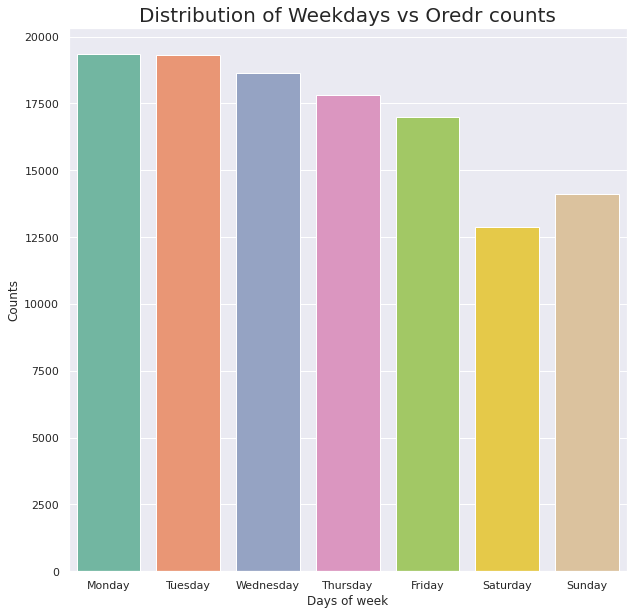

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.barplot(x = 'weekday', y = 'counts', data = weekwise_data, palette='Set2')
plt.title("Distribution of Weekdays vs Oredr counts", fontsize = 20)
plt.xlabel('Days of week')
plt.ylabel('Counts')

#Sampling

In [ ]:
df1.dtypes

order_status                   object
quantity                      float64
price                         float64
freight_value                 float64
payment_sequential            float64
payment_type                   object
payment_installments          float64
payment_value                 float64
review_score                  float64
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
customer_zip_code_prefix        int64
customer_city                  object
customer_state                 object
seller_zip_code_prefix        float64
seller_city                    object
seller_state                   object
sale                          float64
is_delayed                       bool
product_volume_cm             float64
dtype: object

In [ ]:
# df1 = df1.drop(['Unnamed: 0', 'Unnamed: 0.1', 'order_id', 'customer_id'], axis=1)

In [ ]:
df1 = df1.drop(['payment_type', 'product_category_name', 'customer_city', 'seller_city', 'customer_state', 'seller_state'], axis=1)

In [ ]:
df1['is_delayed'] = df1['is_delayed'].map({True: 1, False: 0})

In [ ]:
df1.isna().sum()

order_status                  0
quantity                      0
price                         0
freight_value                 0
payment_sequential            0
payment_installments          0
payment_value                 0
review_score                  0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
customer_zip_code_prefix      0
seller_zip_code_prefix        0
sale                          0
is_delayed                    0
product_volume_cm             0
dtype: int64

In [ ]:
df1['is_delayed'].value_counts()

0    106917
1      8716
Name: is_delayed, dtype: int64

In [ ]:
minority = df1['is_delayed'].value_counts()[1]
majority = df1['is_delayed'].value_counts()[0]
total = minority + majority

minority_per = minority / total
majority_per = majority / total

print("Minority class percentage: ", minority_per * 100)
print("Majority class percentage: ", majority_per * 100)

Minority class percentage:  7.5376406389179555
Majority class percentage:  92.46235936108205


In [ ]:
ecommerce_X = df1.drop(columns=['is_delayed'])
ecommerce_y = df1['is_delayed']

In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(ecommerce_X, ecommerce_y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.25, random_state = 42)

#SMOTE

In [ ]:
categorical_features = ["order_status"]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
    ], remainder='passthrough'
)

oversample_smote = SMOTE(random_state = 42)

clf = make_pipeline(preprocessor, oversample_smote)

In [ ]:
X_dev_smote, y_dev_smote = clf.fit_resample(X_dev, y_dev)

In [ ]:
print('Number of samples for both classes before: {} and {}.'.format(*Counter(y_dev).values()))
print('Number of samples for both classes after: {} and {}.'.format(*Counter(y_dev_smote).values()))

Number of samples for both classes before: 85499 and 7007.
Number of samples for both classes after: 85499 and 85499.


#Random Over Sampler

In [ ]:
ros = RandomOverSampler()
X_dev_randomover, y_dev_randomover = ros.fit_resample(X_dev, y_dev)
print(X_dev.shape)
print('Number of samples for both classes after: {} and {}.'.format(*Counter(y_dev_randomover).values()))

(92506, 16)
Number of samples for both classes after: 85499 and 85499.
